## Smart Text Classifier

This section of code helps in building a text classification model. Here's what's happening:

- **Importing Libraries**: We start by importing essential libraries like pandas, string, re, and various modules from sklearn.

- **Loading Dataset**: The code reads a CSV file containing text data, specifically spam messages.

- **Preprocessing**: Columns are renamed to 'label' and 'message' for clarity. Labels are encoded to numerical values, and text is cleaned by converting to lowercase, removing punctuation and URLs.

- **Splitting the Dataset**: Using `train_test_split`, the dataset is divided into training and testing sets to evaluate model performance.

- **Vectorization**: Text data is transformed into numerical form using `TfidfVectorizer`, converting words to a matrix of Tf-idf features, which represent the importance of a word in a document relative to the entire corpus.

This preprocessing forms the foundation for our model's training.

In [17]:
# Importing dataset
import pandas as pd
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("spam.csv", encoding='latin1')

# Rename columns
df = df[['v1', 'v2']].rename(columns = {'v1':'label', 'v2':'message'})

# Encode labels
label_encode = LabelEncoder()
df['label'] = label_encode.fit_transform(df['label'])

# Clean the text (lowercase, remove punctuation, etc.)
def clean_text(text):
    # lowercase
    text = text.lower()
    # remove punctuation
    text = re.sub(r'/d+', '', text)
    text = re.sub(r"http\S+|www\S+|[\w\.-]+@[\w\.-]+", '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_message'] = df['message'].apply(clean_text)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df['clean_message'], df['label'], test_size=0.2, random_state = 42)

# Vectorize using TF-IDF or CountVectorizer
Vectorizer = TfidfVectorizer(max_features = 3000)
X_train_vec = Vectorizer.fit_transform(X_train)
X_test_vec = Vectorizer.fit_transform(X_test)

## Training the Model

We use Logistic Regression for classification. Here's the process:

- **Training**: The model is trained using the training dataset to learn patterns.

- **Prediction**: Using the `predict` method, predictions are made on the test dataset.

- **Evaluation**: Key metrics like accuracy, precision, recall, and F1-score are computed to assess performance. A confusion matrix is visualized to understand prediction errors.

Accuracy: 0.8654708520179372
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


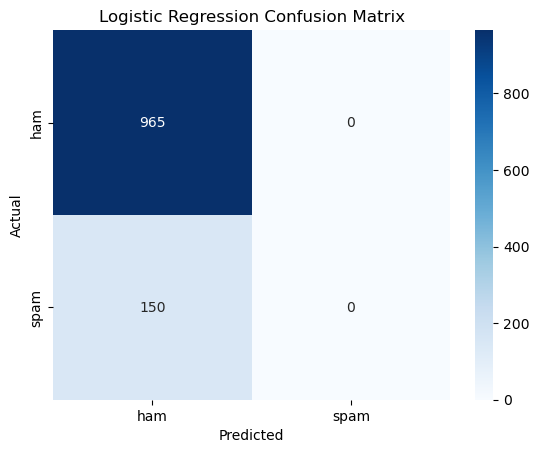

In [31]:
# Training model and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train Model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# make prediction
y_pred = model.predict(X_test_vec)

# Evaluation Matrix
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1-Score: {f1_score(y_test, y_pred)}")

# comfusion matrix evaluation
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt='d', cmap='Blues', xticklabels = ['ham', 'spam'], yticklabels = ['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

## Model Comparison Plan

To evaluate our models, we proceed with the following steps:

- **Naive Bayes**: A simple yet effective probabilistic classifier, trained with our vectorized text data.

- **Random Forest**: An ensemble method that builds multiple decision trees and merges them to get a more accurate and stable prediction.

- **Visual Comparison**: The F1 scores of the models are visualized using a bar plot to facilitate comparison.

Naive Bayes F1: 0.32132963988919666
Random Forest F1: 0.025157232704402517


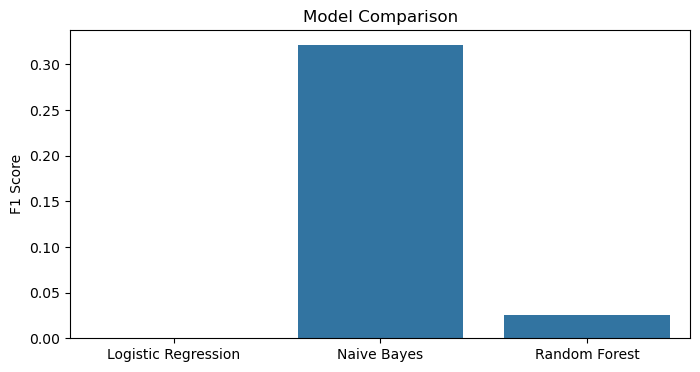

In [33]:
# Model Comparison Plan
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
y_pred_nb = nb_model.predict(X_test_vec)
print(f"Naive Bayes F1: {f1_score(y_test, y_pred_nb)}")

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_vec, y_train)
y_pred_rf = rf_model.predict(X_test_vec)
print(f"Random Forest F1: {f1_score(y_test, y_pred_rf)}")

# Visual Comparison
scores = {
    'Logistic Regression': f1_score(y_test, y_pred),
    'Naive Bayes': f1_score(y_test, y_pred_nb),
    'Random Forest': f1_score(y_test, y_pred_rf)
}

plt.figure(figsize=(8, 4))
sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.ylabel('F1 Score')
plt.title('Model Comparison')
plt.show()

## Model Comparison: Confusion Matrices

We evaluated the performance of our models with confusion matrices, which provide insight into the true positives, false positives, false negatives, and true negatives.

- **Naive Bayes Confusion Matrix**: Shows how the Naive Bayes model performed in classifying the test data.

- **Random Forest Confusion Matrix**: Offers a visual representation of the Random Forest model's predictions.

These matrices help us compare the models' abilities to classify the text data accurately.

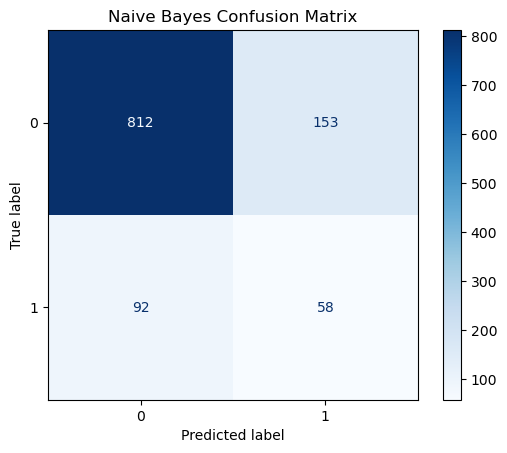

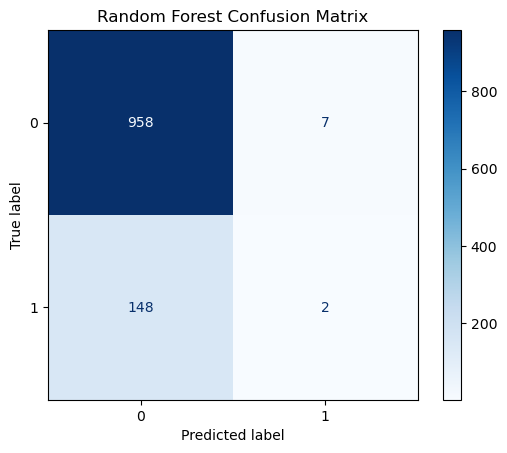

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(nb_model, X_test_vec, y_test, cmap='Blues')
plt.title("Naive Bayes Confusion Matrix")
plt.show()

ConfusionMatrixDisplay.from_estimator(rf_model, X_test_vec, y_test, cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

## Final Conclusion 

After evaluating Naive Bayes, Logistic Regression, and Random Forest classifiers on a text-based spam classification task, the following conclusions were drawn:

#### Naive Bayes
- Achieved the highest **F1 score (~0.32)**.
- Demonstrated a balanced trade-off between precision and recall.
- Captured spam cases significantly better than other models.
- Recommended for deployment based on current performance.

#### Logistic Regression
- Failed to classify any spam instances.
- All performance metrics (Precision, Recall, F1) for spam class were **zero**.
- Needs class balancing and feature reengineering to become viable.

#### Random Forest
- Classified all instances as non-spam.
- Missed **all true positives**, resulting in zero precision and recall for spam.
- Potential fixes include adjusting `class_weight`, tuning hyperparameters, or applying sampling strategies.

#### Overall Takeaway
Among all evaluated models, **Naive Bayes emerged as the most effective choice** for this imbalanced dataset.